<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [314]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except IOError:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [315]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Первое, что стоит отметить, это то, что разделить в csv-файле - знак табуляции.
Сам файл содержит 23699 объявлений о продаже квартир и соответственно такое же количество строк. Каждая строка содержит 22 столбца, которые характеризуют квартиры из объявлений.
Сразу заметно, что данные нуждаются в обработке. Есть много столбцов с пропусками, некоторые столбцы требуют изменения типа данных. Возможно есть какие-то другие проблемы с данными, исследуем это подробнее.

## Предобработка данных

Из `info()` видно, что стобцы `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` не соответствуют стилю `snake_case`.
Исправим это.

In [316]:
data = data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_30

### Обработка пропусков

Пропуски есть в следующих столбцах:<a id='omissions'></a>

In [317]:
for column in data.columns:
    is_null = data[column].isna().sum()
    if is_null:
        print(f"{column:<30}: {is_null}")

ceiling_height                : 9195
floors_total                  : 86
living_area                   : 1903
is_apartment                  : 20924
kitchen_area                  : 2278
balcony                       : 11519
locality_name                 : 49
airports_nearest              : 5542
city_centers_nearest          : 5519
parks_around_3000             : 5518
parks_nearest                 : 15620
ponds_around_3000             : 5518
ponds_nearest                 : 14589
days_exposition               : 3181


#### Название населенного пункта `locality_name`

Посмотрим распределение объявлений по населенным пунктам, отфильтровав их в порядке убывания.

In [318]:
locality_names = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False)
print(f'Всего населенных пунктов в объявлениях:', len(locality_names))
locality_names.head(10)


Всего населенных пунктов в объявлениях: 364


locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: last_price, dtype: int64

Примерно 2/3 объявлений из Санкт-Петербурга, будет логично предположить, что большинство пропущенных названий именно "Санкт-Петербург"
Примерное географическое положение можно выяснить из отдаленности до центра города и аэропорта.
Посмотрим на объявления из Санкт-Петербурга

In [319]:
data.loc[
    data['locality_name'] == 'Санкт-Петербург',
    ['airports_nearest', 'city_centers_nearest']
].describe()

,airports_nearest,city_centers_nearest
count,15636.000000,15660.000000
mean,28046.186237,11601.291571
std,11557.063820,4842.035279
min,0.000000,181.000000
25%,18584.250000,8327.000000
50%,26757.500000,12244.500000
75%,36614.000000,14943.000000
max,54784.000000,29493.000000


Мы можем допустить для простоты, что все объявления с пропущенными `locality_name` относятся к Санкт-Петербургу, если `airports_nearest`  и `city_centers_nearest` меньше максимальных для Петербурга.

In [320]:
data.loc[
    (data['locality_name'].isna()) &
    (data['airports_nearest'] < 54784) &
    (data['city_centers_nearest'] < 29493),
    ['locality_name']
] = 'Санкт-Петербург'

Посмотрим, что еще осталось

In [321]:
data.loc[
    data['locality_name'].isna(),
    ['airports_nearest', 'city_centers_nearest']
].sort_values(by='city_centers_nearest')

,airports_nearest,city_centers_nearest
8986,19659.0,31813.0
21119,19744.0,31897.0
21276,60195.0,41294.0
2033,NaN,NaN
14342,NaN,NaN
17535,NaN,NaN
20382,NaN,NaN
20590,NaN,NaN
21715,NaN,NaN
21898,NaN,NaN


Отлично, осталось всего 11. 8 строк из 11 не имеют никаких географических ориентиров. Поэтому заполним пропущенные значения в них отметкой "Неизвестно"



In [322]:
data.loc[
    (data['locality_name'].isna()) & (data['airports_nearest'].isna()),
    'locality_name'
] = 'Неизвестно'

In [323]:
data.loc[
    data['locality_name'].isna(),
    ['airports_nearest', 'city_centers_nearest']
]

,airports_nearest,city_centers_nearest
8986,19659.0,31813.0
21119,19744.0,31897.0
21276,60195.0,41294.0


Теперь найдем, есть ли объявления с похожими расстояниями для первых 2 строк, потому что они очевидно находятся рядом и потом для третьей строки

In [324]:
airport_nearest_filter = ((data['airports_nearest'] < 20000) &
                          (19500 < data['airports_nearest']))
city_centers_nearest_filter = ((31500 < data['city_centers_nearest']) &
                               (data['city_centers_nearest'] < 32000))
data.loc[
    airport_nearest_filter & city_centers_nearest_filter,
    ['locality_name', 'airports_nearest', 'city_centers_nearest', 'last_price', 'total_area']
].sort_values(by='total_area')


,locality_name,airports_nearest,city_centers_nearest,last_price,total_area
284,Павловск,19516.0,31670.0,2650000.0,30.5
2526,Пушкин,19571.0,31725.0,5200000.0,42.2
221,Павловск,19775.0,31929.0,3750000.0,43.0
21119,NaN,19744.0,31897.0,3500000.0,43.2
8986,NaN,19659.0,31813.0,4850000.0,103.1
8732,Павловск,19575.0,31729.0,9300000.0,151.5
17874,Пушкин,19760.0,31914.0,17000000.0,170.0


Географически подходят Павловск и Пушкин, но квартиры в Пушкине по стоимости значительно дороже, поэтому скорее всего объявления из Павловска.

In [325]:
data.loc[[21119, 8986], 'locality_name'] = 'Павловск'

In [326]:
airport_nearest_filter = ((data['airports_nearest'] < 62000) &
                          (59000 < data['airports_nearest']))
city_centers_nearest_filter = ((40000 < data['city_centers_nearest']) &
                               (data['city_centers_nearest'] < 44000))
data.loc[
    airport_nearest_filter & city_centers_nearest_filter,
    ['locality_name', 'airports_nearest', 'city_centers_nearest', 'last_price', 'total_area']
].sort_values(by='city_centers_nearest')

,locality_name,airports_nearest,city_centers_nearest,last_price,total_area
21276,NaN,60195.0,41294.0,17122148.0,178.3
5659,посёлок Репино,61451.0,42550.0,11067416.0,160.7
2454,посёлок Репино,61484.0,42583.0,28000000.0,160.0
17162,Сестрорецк,61664.0,42763.0,6100000.0,52.5
19984,Сестрорецк,61872.0,42971.0,7990000.0,62.2


In [327]:
data.loc[21276, 'locality_name'] = 'посёлок Репино'

Проверим

In [328]:

print(f'Количество пропусков в locality_name: {len(data[data["locality_name"].isna()])}')

Количество пропусков в locality_name: 0


Сразу, чтобы не возвращаться к этому столбцу позднее, уберем из названия типы населенных пунктов. Такие как "деревня", "поселок" и тому подобное. Найти их будет просто, они начинаются с маленькой буквы. Но чтобы случайно не удалить название, написанной строчными буквами, посмотрим все слова, начинающиеся со строчной буквы в `locality_name`, предшествующие названию.

In [329]:
locality_types = set()

def search_lowers(locality_name):
    locality_name_as_list = locality_name.split(' ')
    low_words = []
    for word in locality_name_as_list:
        if word.islower():
            low_words.append(word)
        else:
            break
    locality_types.add(' '.join(low_words))

data['locality_name'].apply(search_lowers)
locality_types

{'',
 'городской поселок',
 'городской посёлок',
 'деревня',
 'коттеджный поселок',
 'коттеджный посёлок',
 'поселок',
 'поселок городского типа',
 'поселок городского типа имени',
 'поселок станции',
 'посёлок',
 'посёлок городского типа',
 'посёлок городского типа имени',
 'посёлок при железнодорожной станции',
 'посёлок станции',
 'садоводческое некоммерческое товарищество',
 'садовое товарищество',
 'село'}

Хорошая новость, что названия сюда не попали. Думаю можно смело от этого избавиться. Заодно решим проблему того, что у нас один и тот же населенный пункт мог проходить под разными типами.

In [330]:
def change_locality_names(locality_name):
    locality_name_as_list = locality_name.split(' ')
    index = 0
    for i in range(len(locality_name_as_list)):
        if not locality_name_as_list[i].islower():
            index = i
            break
    return ' '.join(locality_name_as_list[index:])

data['locality_name'] = data['locality_name'].apply(change_locality_names)
print('Уникальных населенных пунктов:', len(data['locality_name'].unique()))


Уникальных населенных пунктов: 306


А изначально у нас было 364 уникальных населенных пункта. Значит нам удалось избавиться от некоторых неявных дубликатов в названиях.

#### Всего этажей в доме `floors_total`

Как мы раньше [выяснили](#omissions) в `floors_total` 86 пропусков.

In [331]:
data[data['floors_total'].isna()].groupby('locality_name')['floor'].count()

locality_name
Бугры               1
Красное Село        2
Кудрово             2
Мурино              4
Новое Девяткино     1
Новоселье           1
Павловск            1
Санкт-Петербург    70
Стрельна            1
Токсово             1
Шушары              1
Щеглово             1
Name: floor, dtype: int64

Бóльшая часть пропусков ожидаемо относится к Санкт-Петербургу, где этажность весьма разнообразна. Поэтому лучшим вариантом мне видится заполнить пропущенные значения числом 0, что даст нам потом возможность с одной стороны учитывать,например, квартиры на 1 этаже при анализе влияния этого фактора, чем если мы просто удалим строки.

In [332]:
data['floors_total'].fillna(0, inplace=True)
print('Пропусков в колонке "floors_total":', data['floors_total'].isna().sum())

Пропусков в колонке "floors_total": 0


Изменим тип данных с `float` на `int` в этом столбце.

In [333]:
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

#### Высота потолков `ceiling_height`


Чтобы заполнить пропуски в данном случае на мой взгляд подойдет такой способ:
- сделаем таблицу, содержащую значения моды(т.е.самого распространенного значения) высоты потолка в зависимости от floors_total
- для каждого пропущенного значения будем присваить значение из этой таблицы исходя из этажности здания.

In [334]:
ceiling_height_modes = data.pivot_table(
    index='floors_total',
    values='ceiling_height',
    aggfunc=pd.Series.mode )
ceiling_height_modes

,ceiling_height
floors_total,
0,2.8
1,3
2,2.5
3,3
4,3
5,2.5
6,3
7,3
8,3


Для нескольких значений не удалось найти единственное. Скорее всего это связано с одинаковым количеством объявлений с равной высотой потолков. Заменим их на значение 2.7, которое является распространенным для многоэтажных домов.

In [335]:
def change_list_to_value(height):
    if not isinstance(height, np.float64):
        return 2.7
    else:
        return height

ceiling_height_modes['ceiling_height'] = ceiling_height_modes['ceiling_height'].apply(
    change_list_to_value
)
ceiling_height_modes

,ceiling_height
floors_total,
0,2.80
1,3.00
2,2.50
3,3.00
4,3.00
5,2.50
6,3.00
7,3.00
8,3.00


In [336]:
def fill_ceiling_height(row):
    if np.isnan(row['ceiling_height']):
        row['ceiling_height'] = ceiling_height_modes.loc[
            row['floors_total'], 'ceiling_height'
        ]
    return row['ceiling_height']
data['ceiling_height'] = data.apply(fill_ceiling_height, axis=1)


In [337]:
print('Пропусков в "ceiling_height"', data['ceiling_height'].isna().sum())

Пропусков в "ceiling_height" 0


#### Жилая площадь `living_area`

Построим график зависимости `living_area` от `total_area`. Есть предположение, что жилая площадь коррелирует с общей площадью квартиры.

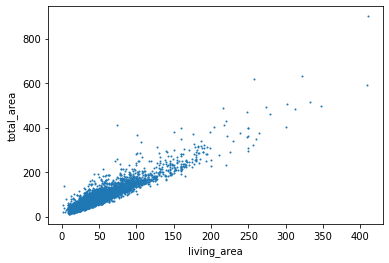

In [338]:
data.plot.scatter(x='living_area', y='total_area', s=1)

Действительно, имеется очень сильная прямая корреляция. Для заполнения пропусков в `living_area` можно использовать коэффициент, который будем умножать на `total_area`.
Коэффициент рассчитаем как отношение медиан для столбцов.

In [339]:
living_area_coef = data['living_area'].median() / data['total_area'].median()
data.loc[
    data['living_area'].isna(),
    'living_area'
] = data[data['living_area'].isna()]['total_area'] * living_area_coef

In [340]:
print('Пропусков в "living_area":', data['living_area'].isna().sum())

Пропусков в "living_area": 0


#### Является апартаментами `is_apartment`

Посмотрим на распределение известных значений в стобце `is_apartment`

In [341]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Как видно, даже среди известных значений доля апартаментов составляет менее 2%. Поэтому мы можем с большой вероятностью предположить, что все пропущенные значения апартаментами не являются.

In [342]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Пропусков в "is_apartment":', data['is_apartment'].isna().sum())

Пропусков в "is_apartment": 0


#### Число балконов `balcony`

In [343]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Можно предположить, что если количество балконов не указано, значит их нет. В соответствии с этим умозаключением и заполним пропуски.

In [344]:
data['balcony'].fillna(0, inplace=True)
print('Пропусков в "balcony":', data['balcony'].isna().sum())

Пропусков в "balcony": 0


#### Площадь кухни `kitchen_area`

Для начала нам нужно учесть, что часть квартир - это студии. Если у них есть пропуски в `kitchen_area`, то можно их заполнить 0, так как студия - это по сути одна большая комната, где совмещены и жилая площадь, и кухонная зона.

In [345]:
data.loc[
    (data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'
] = data.loc[
    (data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'
].fillna(0)

Площадь квартиры можно посчитать как сумма площадей:
- `living_area`
- `kitchen_area`
- нежилая площадь

Посмотрим как распределяется эта нежилая площадь по квартирам, где известны `total_area`, `living_area`, `kitchen_area`

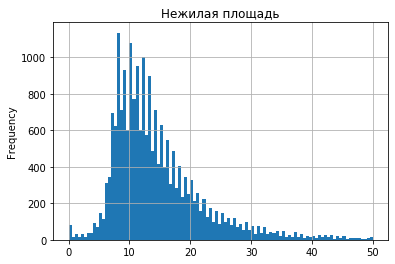

In [301]:
data_known_kitchen = data[~data['kitchen_area'].isna()]
(data['total_area'] - data['living_area'] - data['kitchen_area']).plot(
    kind='hist', bins=100, range=(0, 50), title='Нежилая площадь', grid=True)

In [302]:
(data['total_area'] - data['living_area'] - data['kitchen_area']).describe()

count    21570.000000
mean        15.369032
std         12.330309
min        -29.800000
25%          9.400000
50%         12.600000
75%         17.800000
max        378.300000
dtype: float64

Как видно из графика и данных, медиана этого распределения имеет значение 12.7 метра. Воспользуемся им, чтобы заполнить пропущенные значения `kitchen_area`

In [346]:
data['kitchen_area'].mode()

0    6.0
dtype: float64

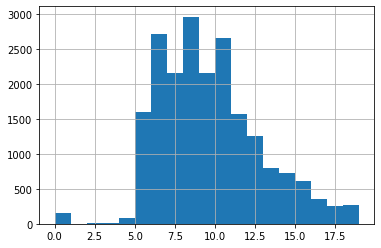

In [350]:
data['kitchen_area'].hist(range=(0, 20), bins=[i for i in range(20)])

In [306]:
data['kitchen_area'].fillna(value=(
        data['total_area'] - data['living_area'] - 12.6), inplace=True)
data['kitchen_area'].isna().sum()

0

In [309]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [ ]:
data.loc[
    data['kitchen_area'].isna(), 'kitchen_area'
] = data

## Расчёты и добавление результатов в таблицу

## Исследовательский анализ данных

## Общий вывод

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод

Изучим
содержимое
столбца
`ceiling_height`
plt.rcParams['figure.figsize'] = [9, 6]  # зададим размер окна для графиков
data['ceiling_height'].plot(style='.', title='Данные о высоте потолков в метрах')
Как
видно
из
визуализации
данных
`ceiling_height`, основная
часть
значений
сосредоточена
в
районе
2 - 3
метров.
Согласно
строительным
нормам, минимальная
высота
допустимая
высота
потолков - 2.50
метров.Проверим
это
в
нашей
таблице.
data[data['ceiling_height'] < 2.50].sort_values(by='ceiling_height')
Действительно, квартир
с
высотой
менее
2.50
всего
73.
Можно
списать
эти
данные
на
ошибку
измерений
или
например
натяжные / навесные
потолки
в
низких
квартирах.
Теперь
посмотрим
внимательнее
на
строки, где
высота
потолков
неправдоподобно
большая.
data['ceiling_height'].plot(style='.', title='Потолки выше 5 м', ylim=(5, 110), grid=True)
data[data['ceiling_height'] > 5].sort_values(by='ceiling_height')
В
объявлениях, где
высота
потолков
указана
от
24
до
32
метров, почти
наверняка
просто
ошибка
в
разрядности
и
нужно
поделить
высоту
на
10
ceiling_height_filter_from24_to_32 = (
        (data['ceiling_height'] >= 24) &
        (data['ceiling_height'] <= 32))
data.loc[ceiling_height_filter_from24_to_32, 'ceiling_height'] /= 10
data[data['ceiling_height'] > 5].sort_values(by='ceiling_height')
Пожалуй
квартира
с
6
метровыми
потолками
за
119
миллионов - это
крайнее
значение, которому
можно
доверять.
Нам
же
следует
заполнить
пропуски
и
поправить
вероятные
ошибки.И
в
данном
случае
на
мой
взгляд
подойдет
такой
способ:
- сделаем
таблицу, содержащую
значения
моды(т.е.самого
распространенного
значения) высоты
потолка
в
зависимости
от
`floors_total`
- для
каждого
неправильного / пропущенного
значения
будем
присваить
значение
из
этой
таблицы
исходя
из
этажности
здания.
ceiling_modes_for_floors_total = data.pivot_table(
    index='floors_total',
    values='ceiling_height',
    aggfunc=pd.Series.mode
)
ceiling_modes_for_floors_total

data[data['ceiling_height'].isna()].pivot_table(index='floors_total', values='locality_name', aggfunc='count')
ceiling_modes_for_floors_total

filter = ((data['ceiling_height'].isna())
          & (data['ceiling_height'] < 2.4)
          & data['ceiling_height'] > 6)
data['ceiling_height'].value_counts()
ceiling_modes_for_floors_total['floor_total']
data['ceiling_height'].hist(range=(2.5, 5), bins=30)
data['ceiling_height'].value_counts()